In [1]:
%matplotlib notebook

In [2]:
from forced_barotropic_sphere.sphere import Sphere
from forced_barotropic_sphere.solver import Solver
from forced_barotropic_sphere.forcing import Forcing
#import bm_methods.bm_methods
import forced_barotropic_sphere.plotting as plotters
import forced_barotropic_sphere.ensemble_methods as ensemble_methods
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib as mpl          # Plotting routines
import matplotlib.pyplot as plt    
import matplotlib.animation as manim
import matplotlib.ticker as mticker
from IPython.display import display, clear_output, HTML, FileLink  # Some technical stuff, used to display animation
#from ipywidgets import FloatProgress
from ipykernel.pylab.backend_inline import flush_figures
import cartopy                   # Map projection stuff
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

# Test a single model run

integrating for  148.14814814814815  days, with a dt of  0.037037037037037035  days


/home/bertossa/miniconda3/envs/jupyter/lib/python3.10/site-packages/spharm/spharm.py:414: ComplexWarning: Casting complex values to real discards the imaginary part
  a,b,ierror = _spherepack.shaes(datagrid,self.wshaes,lwork)
100%|███████████████████████████████████████| 4000/4000 [00:54<00:00, 73.01it/s]


<IPython.core.display.Javascript object>


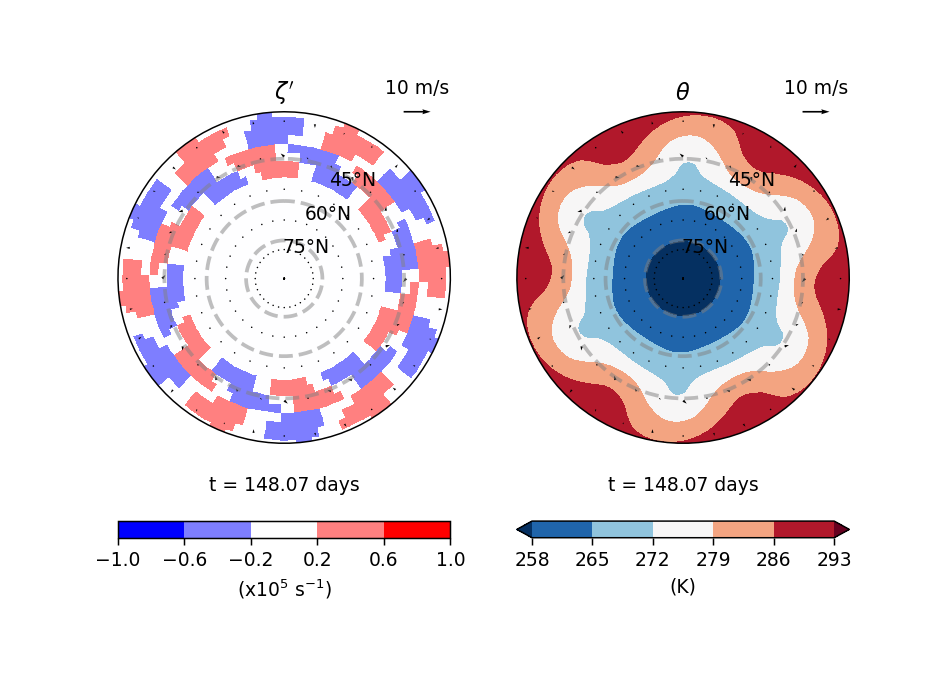

In [12]:
dt = 3200 #time between integration steps (seconds)
Nt = 4000 #number of integration steps
T= Nt*dt #total integration time
print('integrating for ', T/86400, ' days, with a dt of ', dt/86400, ' days')

ofreq = 2

#T42 resolution
nlat=64; nlon=128
st = Sphere(nlat,nlon, U=12)
#st.held_1985()
F = Forcing(st,dt,T)
forcing_tseries = F.generate_stocheddy_tseries(A=8e-10)

k0=6
vortp = 10e-5 * np.exp( -0.5 * (st.glats - 20.)**2 / 10**2 ) * np.cos(k0 * st.rlons)
thetap = np.zeros(vortp.shape)
vortp = np.zeros(thetap.shape)
ics = np.array([vortp,thetap])

sln = Solver(st, forcing=F, ofreq=ofreq, ics= ics).integrate_dynamics(linear=False)
tidx=int(Nt/ofreq)-1
f,ax = plotters.plot_overview(sln.isel(time=tidx), levels=[np.linspace(-1,1,6),np.arange(258,300,7)], perturbation=[True,False])
f.savefig('./images/L18_singlerun.png',dpi=300, bbox_inches='tight')

# Testing some ensemble methods

In [5]:
num_members= 5 #num of members in the ensemble
ofreq=5

thetap = np.zeros((nlat,nlon))
vortp = np.zeros((nlat,nlon))

k0=6
vortp = 10e-5 * np.exp( -0.5 * (st.glats - 20.)**2 / 10**2 ) * np.cos(k0 * st.rlons)

ics = np.array([vortp,thetap])
ensemble = ensemble_methods.integrate_ensemble(nlat,nlon,dt=dt, T=T, ofreq=ofreq, ics=ics,
                                               forcing_type='stochastic_eddy', n_ens=num_members, linear=False, vortpert=1e-6)

tidx=int(Nt/ofreq)-1

/home/bertossa/miniconda3/envs/jupyter/lib/python3.10/site-packages/spharm/spharm.py:414: ComplexWarning: Casting complex values to real discards the imaginary part
  a,b,ierror = _spherepack.shaes(datagrid,self.wshaes,lwork)
100%|█████████████████████████████████████████| 100/100 [00:01<00:00, 68.99it/s]


<IPython.core.display.Javascript object>


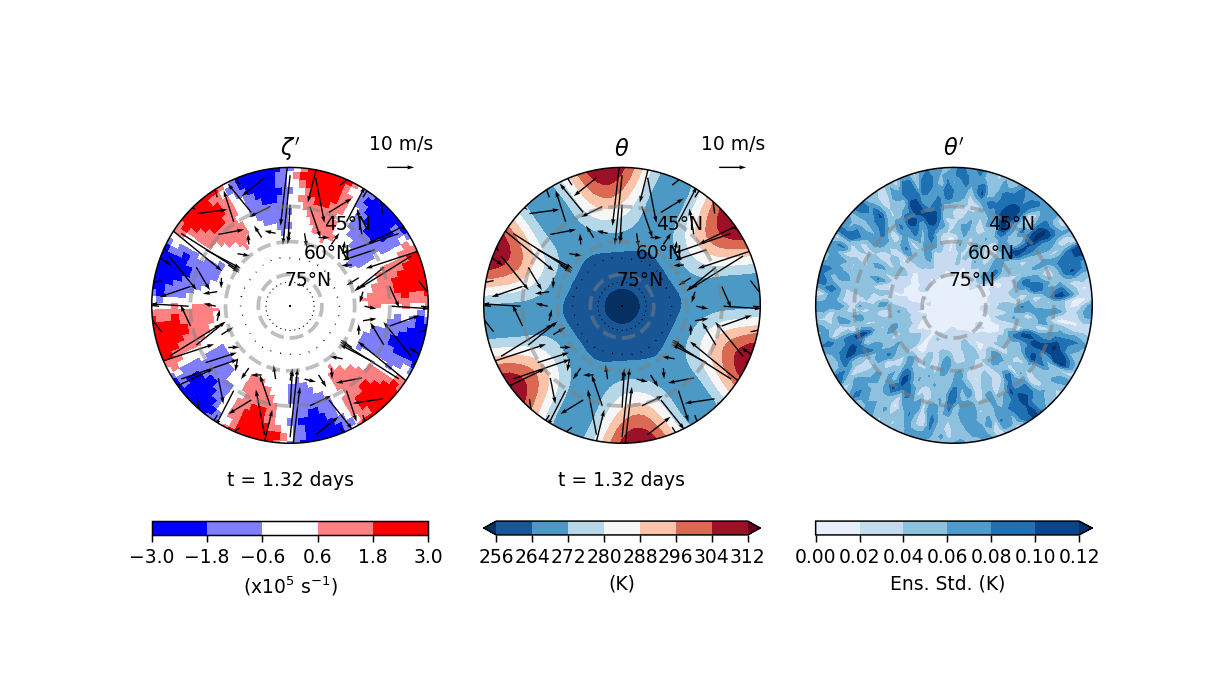

/home/bertossa/miniconda3/envs/jupyter/lib/python3.10/site-packages/cartopy/crs.py:529: UserWarning: Some vectors at source domain corners may not have been transformed correctly
  warnings.warn('Some vectors at source domain corners '
/home/bertossa/miniconda3/envs/jupyter/lib/python3.10/site-packages/cartopy/crs.py:529: UserWarning: Some vectors at source domain corners may not have been transformed correctly
  warnings.warn('Some vectors at source domain corners '


In [6]:
f,axs=plotters.plot_ensemble_overview(ensemble.isel(time=tidx), perturbation=[True,False],
                                      levels=[np.linspace(-3,3,6),None,None])